# Support Vector Machines

This is a supervised training technique. 

This classifies data - data with many features.  
This finds "support vectors" which are somewhat abstract higher dimensions of the data.  

There is a `svm` part of the `sklearn` python package that can be used to implement support-vector classification.  


## Dependencies

In [14]:
import numpy as np
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

## Create Fake-Data Generator

In [2]:
minIncome = 20000
maxIncome = 200000
minAge = 20
maxAge = 70

#Create fake income/age clusters for N people in k clusters
def createClusteredData(NPeople, kClusters):
    np.random.seed(1234)
    pointsPerCluster = float(NPeople)/kClusters
    X = []
    y = []
    for i in range (kClusters):
        incomeCentroid = np.random.uniform(minIncome, maxIncome)
        ageCentroid = np.random.uniform(minAge, maxAge)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

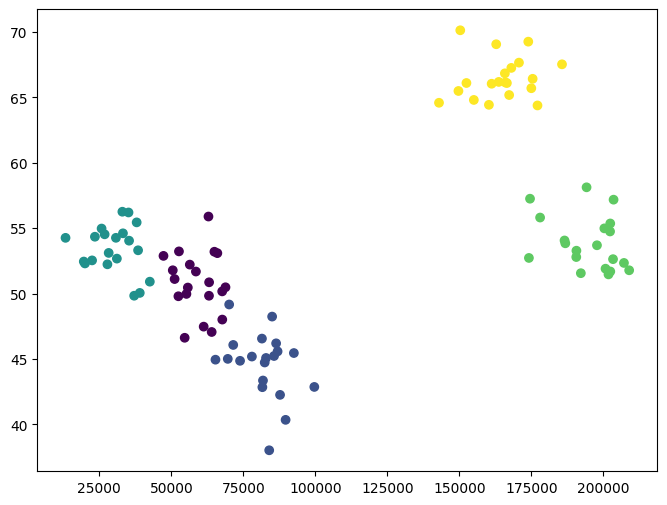

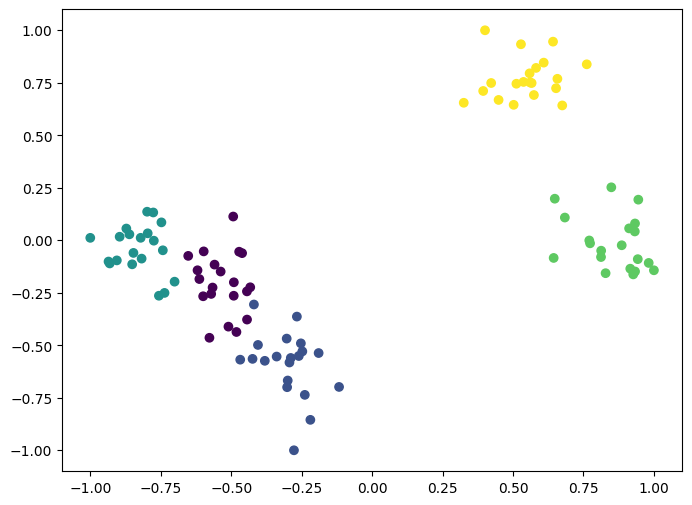

In [3]:
## Create Clustered Data
(X, y) = createClusteredData(100, 5)

# Polt the Data Points
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

# Scale && plot the data-points SCALED
# fitting the "x" array between -1 and 1
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

Now we'll use linear SVC to partition our graph into clusters:

In [4]:
C = 1.0
svcLinear = svm.SVC(kernel='linear', C=C).fit(X, y)
svcPoly = svm.SVC(kernel='poly', C=C).fit(X, y)
svcSigmoid = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
# ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

By setting up a dense mesh of points in the grid and classifying all of them, we can render the regions of each cluster as distinct colors:

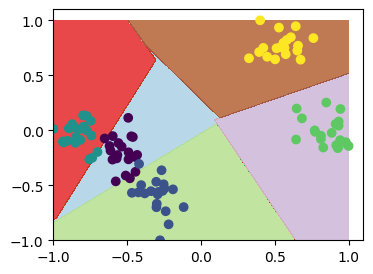

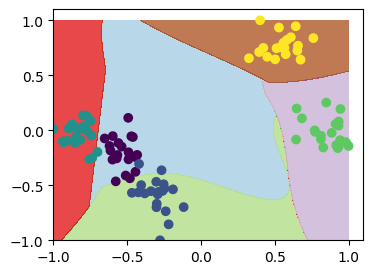

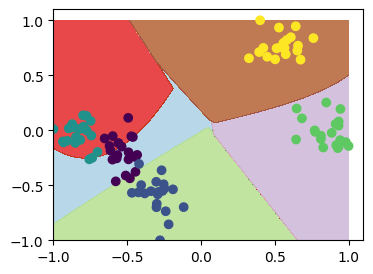

In [5]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(4, 3))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(float)) # Draw the points
    plt.show()
    
plotPredictions(svcLinear)
plotPredictions(svcPoly)
plotPredictions(svcSigmoid)

## Predict a Single Input
These return which cluster number the input would fit into.  

In [11]:
print(svcLinear.predict(scaling.transform([[200000, 40]])))
print(svcPoly.predict(scaling.transform([[200000, 40]])))
print(svcSigmoid.predict(scaling.transform([[200000, 40]])))

[3]
[3]
[3]


In [13]:
print(svcLinear.predict(scaling.transform([[50000, 65]])))
print(svcPoly.predict(scaling.transform([[50000, 65]])))
print(svcSigmoid.predict(scaling.transform([[50000, 65]])))

[2]
[0]
[2]
